In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [60]:
df=pd.read_csv('HospitalityEmployees.csv')
df.isnull().sum()


Date         0
Employees    0
dtype: int64

In [61]:
df['Date']=pd.to_datetime(df['Date'])
X=df[['Employees']].values
scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)
X_scaler

array([[-1.5142562 ],
       [-1.47522967],
       [-1.41473855],
       [-1.38585892],
       [-1.34175895],
       [-1.28399968],
       [-1.2422413 ],
       [-1.22975281],
       [-1.26331562],
       [-1.34917399],
       [-1.35893062],
       [-1.35073505],
       [-1.50449957],
       [-1.44361818],
       [-1.38702972],
       [-1.29024393],
       [-1.22702095],
       [-1.1860431 ],
       [-1.18760416],
       [-1.17394488],
       [-1.21219087],
       [-1.29219526],
       [-1.30039083],
       [-1.28868287],
       [-1.48693763],
       [-1.44205712],
       [-1.39132264],
       [-1.31326958],
       [-1.27190146],
       [-1.2422413 ],
       [-1.2051661 ],
       [-1.20126345],
       [-1.22819175],
       [-1.31209878],
       [-1.32809966],
       [-1.32614833],
       [-1.4377642 ],
       [-1.40537219],
       [-1.36088194],
       [-1.30936693],
       [-1.23287493],
       [-1.18331124],
       [-1.18760416],
       [-1.16613957],
       [-1.18057939],
       [-1

In [ ]:
def init (X, n_components):
    np.random.seed(42)
    weights=np.ones(n_components)
    means = np.random.choice(X.flatten(), n_components).reshape(-1, 1)
    variances=np.ones(n_components)
    return weights,means,variances
def gaussian(x,mean,var):
    coeff = 1.0 / np.sqrt(2 * np.pi * var)
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (coeff * exponent).flatten()
def EM (X,n_components,n_iters=100,tol=1e-4):
    n_samples=X.shape[0]
    weights,means,variances=init(X,n_components)
    log_likelihoods=[]
    # N- Step
    for i in range (n_iters):
        responsibilities = np.zeros((n_samples, n_components))
        for k in range(n_components):
            responsibilities[:, k] = weights[k] * gaussian(X, means[k], variances[k])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    #M-Step
        Nk = responsibilities.sum(axis=0)
    # Cập nhật trọng số
        weights = Nk / n_samples
    # Cập nhật trung bình
        means = (responsibilities.T @ X) / Nk.reshape(-1, 1)
    # Cập nhật phương sai
        variances = np.zeros(n_components)
        for k in range(n_components):
            variances[k] = np.sum(responsibilities[:, k] * ((X.flatten() - means[k]) ** 2)) / Nk[k]
     # Tính Log-Likelihood
        log_likelihood=np.sum(np.log(np.sum([weights[k] * gaussian(X, means[k], variances[k]) for k in range(n_components)], axis=0)))
        log_likelihoods.append(log_likelihood)
    # Dừng nếu hội tụ
        if i > 0 and abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            print(f"EM hội tụ tại vòng lặp {i}")
            break
    return weights, means, variances, responsibilities, log_likelihoods




Final Parameters:
Weights: [0.57054873 0.42945127]
Means: [[-0.59976868]
 [ 0.79682441]]
Variances: [0.36147844 0.73547018]


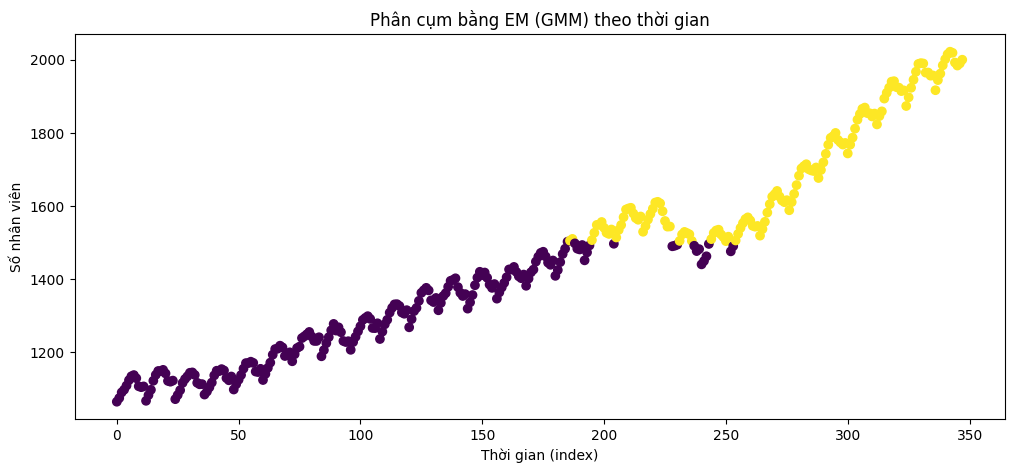

In [ ]:
n_components = 2
weights, means, variances, responsibilities, log_likelihoods = EM(X_scaler  , n_components)
print("Final Parameters:")
print("Weights:", weights)
print("Means:", means)
print("Variances:", variances)
# # Gán nhãn theo xác suất cao nhất
# labels = np.argmax(responsibilities, axis=1)
# df['Cluster'] = labels

# # Vẽ kết quả phân cụm
# plt.figure(figsize=(12, 5))
# plt.scatter(df.index, df['Employees'], c=labels, cmap='viridis')
# plt.title("Phân cụm bằng EM (GMM) theo thời gian")
# plt.xlabel("Thời gian (index)")
# plt.ylabel("Số nhân viên")
# plt.show()